In [ ]:
!pip install opendatasets

## Importing libs and downloading Dataset

In [17]:
import opendatasets as od
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier, BaggingClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
od.download("https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset")

## Exploring Dataset

In [5]:
df = pd.read_csv("/content/heart-disease-dataset/heart.csv")

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
sc = StandardScaler()
sc.fit(df.drop("target",axis=1))
X_scale = sc.transform(df.drop("target",axis=1))
y = df["target"]

In [46]:
df['target'].value_counts()

,count
target,
1,526
0,499


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.33, random_state=42)

## Logistic Regression

In [15]:
Logistic_model = LogisticRegression(solver='liblinear', random_state=0)
Logistic_model.fit(X_train, y_train)
y_pred = Logistic_model.predict(X_test)

In [38]:
Logistic_metrics  = [accuracy_score(y_test,y_pred),
                     precision_score(y_test,y_pred),
                     recall_score(y_test,y_pred),
                     f1_score(y_test,y_pred)]
logistic_cm = confusion_matrix(y_test,y_pred)
Logistic_metrics

[0.9056047197640118,
 0.8736263736263736,
 0.9464285714285714,
 0.9085714285714286]

##RandomForestClassifier

In [36]:
forest_model = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=3)
forest_model.fit(X_train, y_train)
y_pred = forest_model.predict(X_test)

In [37]:
forest_metrics  = [accuracy_score(y_test,y_pred),
                     precision_score(y_test,y_pred),
                     recall_score(y_test,y_pred),
                     f1_score(y_test,y_pred)]
forest_cm = confusion_matrix(y_test,y_pred)
forest_metrics

[0.9056047197640118,
 0.8736263736263736,
 0.9464285714285714,
 0.9085714285714286]

##GradientBoostingClassifier

In [39]:
gbc_model = GradientBoostingClassifier(n_estimators=200, max_depth=5, random_state=3)
gbc_model.fit(X_train, y_train)
y_pred = gbc_model.predict(X_test)

In [40]:
gbc_metrics  = [accuracy_score(y_test,y_pred),
                     precision_score(y_test,y_pred),
                     recall_score(y_test,y_pred),
                     f1_score(y_test,y_pred)]
gbc_cm = confusion_matrix(y_test,y_pred)
gbc_metrics

[0.9911504424778761, 1.0, 0.9821428571428571, 0.990990990990991]

##BaggingClassifier

In [42]:
bagging_model = BaggingClassifier(n_estimators=200, random_state=3)
bagging_model.fit(X_train, y_train)
y_pred = bagging_model.predict(X_test)

In [43]:
bagging_metrics  = [accuracy_score(y_test,y_pred),
                     precision_score(y_test,y_pred),
                     recall_score(y_test,y_pred),
                     f1_score(y_test,y_pred)]
bagging_cm = confusion_matrix(y_test,y_pred)
bagging_metrics

[0.9911504424778761, 1.0, 0.9821428571428571, 0.990990990990991]

## XGBoost

In [47]:
xgb_model = xgb.XGBClassifier(n_estimators=200, max_depth=5, random_state=3)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)

In [48]:
xgb_metrics  = [accuracy_score(y_test,y_pred),
                     precision_score(y_test,y_pred),
                     recall_score(y_test,y_pred),
                     f1_score(y_test,y_pred)]
xgb_cm = confusion_matrix(y_test,y_pred)
xgb_metrics

[0.9823008849557522, 1.0, 0.9642857142857143, 0.9818181818181818]

## Model Comparision

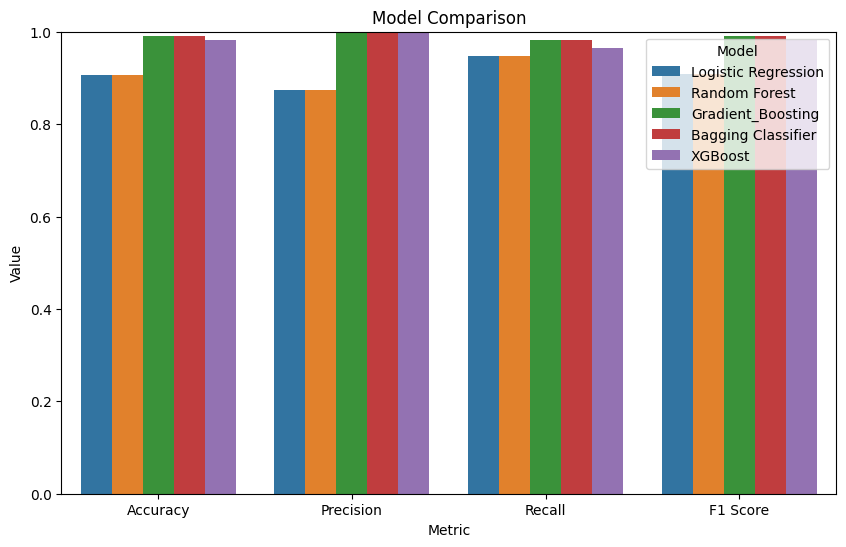

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example metrics
models = ['Logistic Regression']*4+['Random Forest']*4+ ['Gradient_Boosting']*4+['Bagging Classifier']*4+['XGBoost']*4
# print(models)
df = pd.DataFrame({
    'Model': models,
    'Value': Logistic_metrics+forest_metrics+gbc_metrics+bagging_metrics+xgb_metrics,
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score']*5
})

plt.figure(figsize=(10,6))
sns.barplot(x='Metric', y='Value', hue='Model', data=df)
plt.ylim(0,1)
plt.title("Model Comparison")
plt.show()


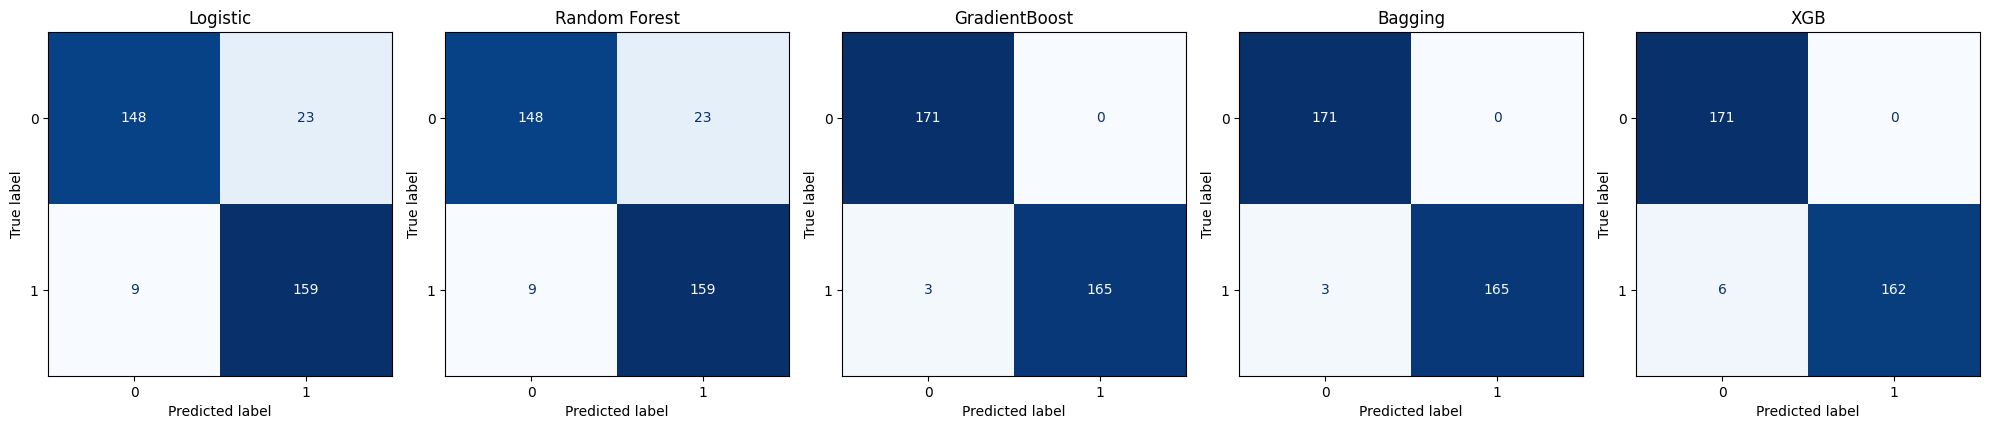

In [55]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cmlist = [logistic_cm, forest_cm, gbc_cm, bagging_cm, xgb_cm]
model_names = ['Logistic', 'Random Forest', 'GradientBoost', 'Bagging', 'XGB']

fig, axes = plt.subplots(1, 5, figsize=(20,4))

for i in range(5):
    cm = cmlist[i]
    name = model_names[i]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1])
    disp.plot(ax=axes[i], cmap
              =plt.cm.Blues, colorbar=False)
    axes[i].set_title(name)

plt.tight_layout()
plt.show()


The best Model here comes out to be GradientBoosting, so we would use it

In [54]:
import joblib

In [56]:
joblib.dump(sc, 'scaler.pkl')
joblib.dump(gbc_model, 'model.pkl')

['model.pkl']